# All Time Olympic Games Medals



The following code loads the olympics dataset (olympics.csv), which was derrived from the Wikipedia entry on All Time Olympic Games Medals, and does some basic data cleaning.

The columns are organized as # of Summer games, Summer medals, # of Winter games, Winter medals, total # number of games, total # of medals.

In [8]:
import pandas as pd

df = pd.read_csv('olympics.csv', index_col=0, skiprows=1)

for col in df.columns:
    if col[:2]=='01':
        df.rename(columns={col:'Gold'+col[4:]}, inplace=True)
    if col[:2]=='02':
        df.rename(columns={col:'Silver'+col[4:]}, inplace=True)
    if col[:2]=='03':
        df.rename(columns={col:'Bronze'+col[4:]}, inplace=True)
    if col[:1]=='№':
        df.rename(columns={col:'#'+col[1:]}, inplace=True)

names_ids = df.index.str.split('\s\(') # split the index by '('

df.index = names_ids.str[0] # the [0] element is the country name (new index) 
df['ID'] = names_ids.str[1].str[:3] # the [1] element is the abbreviation or ID (take first 3 characters from that)

df = df.drop('Totals')
df.head()

,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,ID
Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,AFG
Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,ALG
Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,ARG
Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,ARM
Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,ANZ


## Question 1

Which country has won the most gold medals in summer games ?

In [10]:
def most_gold():
    
    return df['Gold'].idxmax()

most_gold()

'United States'

## Question 2

Which country had the biggest difference between their summer and winter gold medal counts ?

In [13]:
def biggest_diff():
    
    return (df['Gold'] - df['Gold.1']).abs().idxmax()

biggest_diff()

'United States'

## Question 3

Which country has the biggest difference between their summer gold medal counts and winter gold medal counts relative to their total gold medal count ? 

(This includes countries that have won at least 1 gold in both summer and winter)

In [15]:
def relative_biggest_diff():
    
    new_df = df[(df['Gold']>0) & (df['Gold.1']>0)]
    
    return ((new_df['Gold'] - new_df['Gold.1']).abs()/new_df['Gold.2']).idxmax() 
    
relative_biggest_diff()

'Bulgaria'

## Question 4

Which are the top 5 countries if we weights each gold medal for 3 points, silver medals for 2 points, and bronze medals for 1 point ?

<IPython.core.display.Javascript object>


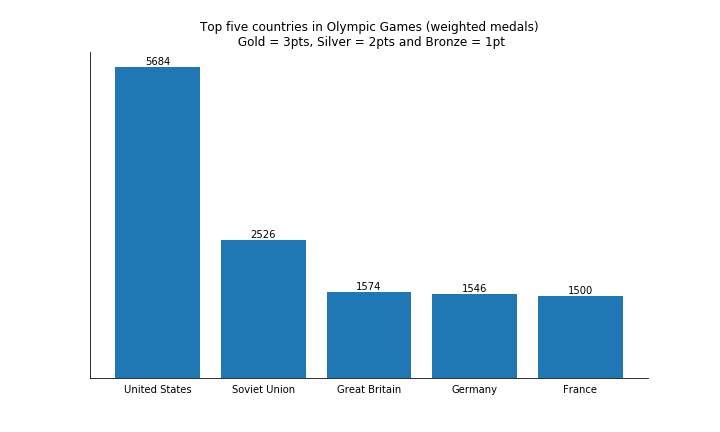

In [84]:
import matplotlib.pyplot as plt
%matplotlib notebook
    
def top_five():
    
    return (df['Gold.2']*3 + df['Silver.2']*2 + df['Bronze.2']).sort_values(ascending=False)[:5] 

top5 = top_five()
    
fig, ax = plt.subplots(figsize=(10,6))
bars = plt.bar(top5.index, top5)
ax.set_title('Top five countries in Olympic Games (weighted medals)\n Gold = 3pts, Silver = 2pts and Bronze = 1pt')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gca().axes.get_yaxis().set_ticks([])
ax.tick_params(bottom=False)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,'%d' % int(height), ha='center', va='bottom')